In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("../")
import library as lib
import math
from tqdm.auto import tqdm

C:\Users\cdipt\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\cdipt\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\cdipt\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\cdipt\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [13]:
f = open("./endsemfit.txt","r")
f = f.readlines()
f = list(map(lambda x: (int(x.split("\t")[0]),
                        int(x.split("\t")[1]),
                        int(x.split("\t")[2][:-1])),f))

In [15]:
time = [f[i][0] for i in range(len(f))]
x = [f[i][1] for i in range(len(f))] # Counts
del_x = [f[i][2] for i in range(len(f))] # Error

In [ ]:
# Counts is the indicator of number of available atoms present
# count = (-lambda*N)*t


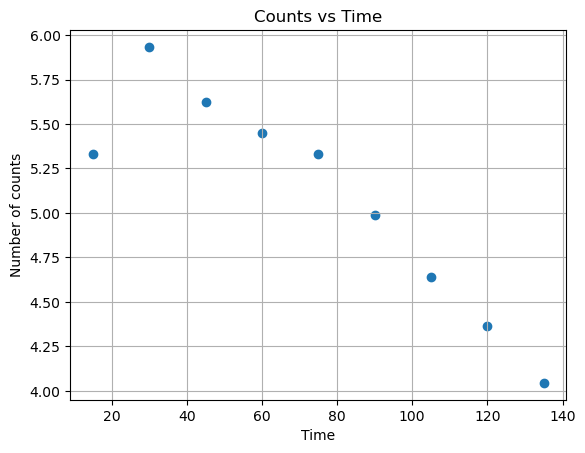

In [33]:
plt.scatter(time[1:],(np.array(x)/np.array(time))[1:]) #Avoiding the first one since it is noisy
plt.xlabel("Time")
plt.ylabel("counts")
plt.title("Counts vs Time")
plt.grid()
plt.show()

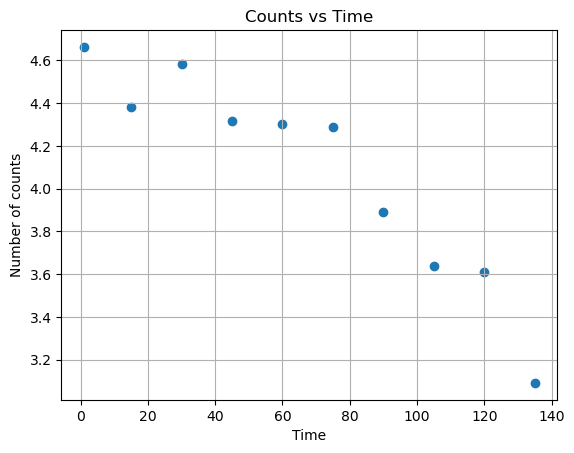

In [23]:
plt.scatter(time,np.log(np.array(x)))
plt.xlabel("Time")
plt.ylabel("Number of counts")
plt.title("Counts vs Time")
plt.grid()
plt.show()

In [ ]:
linear_fit(x = x,y = ,dx=None)

In [24]:
x = np.array(x).cumsum()

In [28]:
x = x - 106

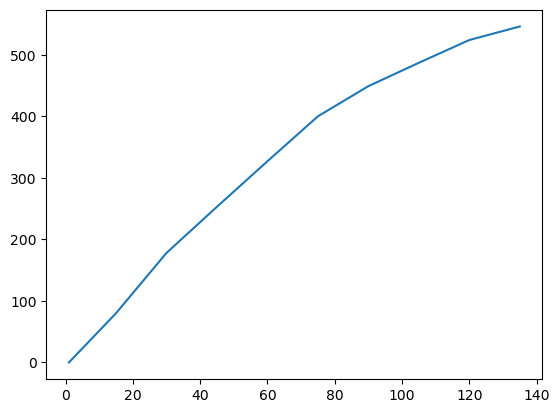

In [29]:
plt.plot(time,x)

# Question 5

In [59]:
matrix,_ = lib.io.reader("./endsemmat.txt")
a = lib.matrix.matrix(matrix)

In [60]:
guess = lib.matrix.matrix([[1],[2],[3],[4],[5]])
eigen_vector,eigen_value,iterations = lib.Eigen_Value_Power_Iteration(guess=guess,
                                                                          matrix = a,
                                                                          eps = 1e-3,
                                                                          MAX_ITER = 10000)

In [61]:
print(eigen_value)

3.7281657295109576


In [62]:
print(eigen_vector)

 0.28767935746014506	
-0.4990037996411103	
 0.5773491209102524	
-0.5009942194713772	
 0.2896697772904121	



In [63]:
def lambd_(k):
    a = -1
    c = -1
    b = 2
    n = 5
    return b + 2*((a*c)**0.5)*math.cos(k*math.pi/(n+1))

def v_(i,k):
    a = -1
    c = -1
    b = 2
    n = 5
    return 2*( ((c/a)**0.5)**k) *(math.sin(i*k*math.pi/(n+1)))

In [64]:
lambd_(1)

3.7320508075688776

In [65]:
v_1 = lib.matrix.matrix([[v_(i,1)] for i in range(1,6,1)])
lib.matrix.normalize_matrix_list(v_1)

In [79]:
v_2 = lib.matrix.matrix([[v_(i,2)] for i in range(1,6,1)])
lib.matrix.normalize_matrix_list(v_2)
print(v_2)

 0.5	
 0.5000000000000001	
 7.07050159149938e-17	
-0.49999999999999994	
-0.5	



In [80]:
U1 = np.array(v_1.matrix)
A = np.array(a.matrix) - eigen_value*U1@U1.T


In [88]:
print(a)

 2.0	-1.0	 0.0	 0.0	 0.0	
-1.0	 2.0	-1.0	 0.0	 0.0	
 0.0	-1.0	 2.0	-1.0	 0.0	
 0.0	 0.0	-1.0	 2.0	-1.0	
 0.0	 0.0	 0.0	-1.0	 2.0	



In [99]:
np.linalg.eig(A)

(array([-3.46021654,  1.        ,  2.        ,  3.73205081,  3.        ]),
 array([[-2.88675135e-01, -5.00000000e-01,  5.77350269e-01,
         -2.88675135e-01, -5.00000000e-01],
        [-5.00000000e-01, -5.00000000e-01,  4.11095076e-16,
          5.00000000e-01,  5.00000000e-01],
        [-5.77350269e-01, -3.22219832e-16, -5.77350269e-01,
         -5.77350269e-01,  2.71946847e-16],
        [-5.00000000e-01,  5.00000000e-01,  3.29997042e-16,
          5.00000000e-01, -5.00000000e-01],
        [-2.88675135e-01,  5.00000000e-01,  5.77350269e-01,
         -2.88675135e-01,  5.00000000e-01]]))

In [98]:
np.linalg.eig(np.array(a.matrix))[1][:,4]

array([-5.00000000e-01, -5.00000000e-01, -3.68521763e-16,  5.00000000e-01,
        5.00000000e-01])

In [100]:
np.linalg.eig(np.array(a.matrix))[0]

array([3.73205081, 3.        , 2.        , 0.26794919, 1.        ])

In [84]:
np.linalg.eig(A)

(array([-3.46021654,  1.        ,  2.        ,  3.73205081,  3.        ]),
 array([[-2.88675135e-01, -5.00000000e-01,  5.77350269e-01,
         -2.88675135e-01, -5.00000000e-01],
        [-5.00000000e-01, -5.00000000e-01,  4.11095076e-16,
          5.00000000e-01,  5.00000000e-01],
        [-5.77350269e-01, -3.22219832e-16, -5.77350269e-01,
         -5.77350269e-01,  2.71946847e-16],
        [-5.00000000e-01,  5.00000000e-01,  3.29997042e-16,
          5.00000000e-01, -5.00000000e-01],
        [-2.88675135e-01,  5.00000000e-01,  5.77350269e-01,
         -2.88675135e-01,  5.00000000e-01]]))

In [71]:
np.array(v_1.matrix).T

array([[0.28867513, 0.5       , 0.57735027, 0.5       , 0.28867513]])

In [58]:
print(v_1)

 0.28867513459481287	
 0.5	
 0.5773502691896258	
 0.5000000000000001	
 0.28867513459481287	



# Question6

In [256]:
def sampling_dist(x):
    return np.random.randn()
def target_dist(x):
    return 0.5*(4-x**2)


In [257]:
s = lib.random.LGC(no_sample=1000000)
C = 1.2

In [258]:
samples = []
i = 0
accep = 0
rej = 0
while len(samples) < 20000:
    x = np.random.randn()
    if s[i] <= abs(target_dist(x)/(C*x)):
        samples.append(x)
        accep = accep +1
    else:
        rej = rej+1
    i = i+1

Text(0.5, 1.0, 'Target Distribution')

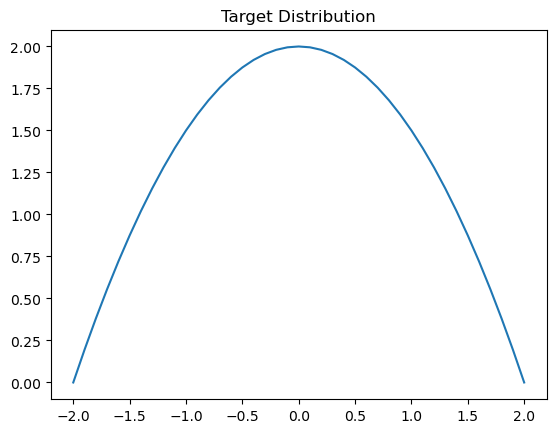

In [259]:
plt.plot(np.arange(-2,2.1,0.1),0.5*(4-np.arange(-2,2.1,0.1)**2), label = r"$y = e^{-2x}$")
plt.title("Target Distribution")

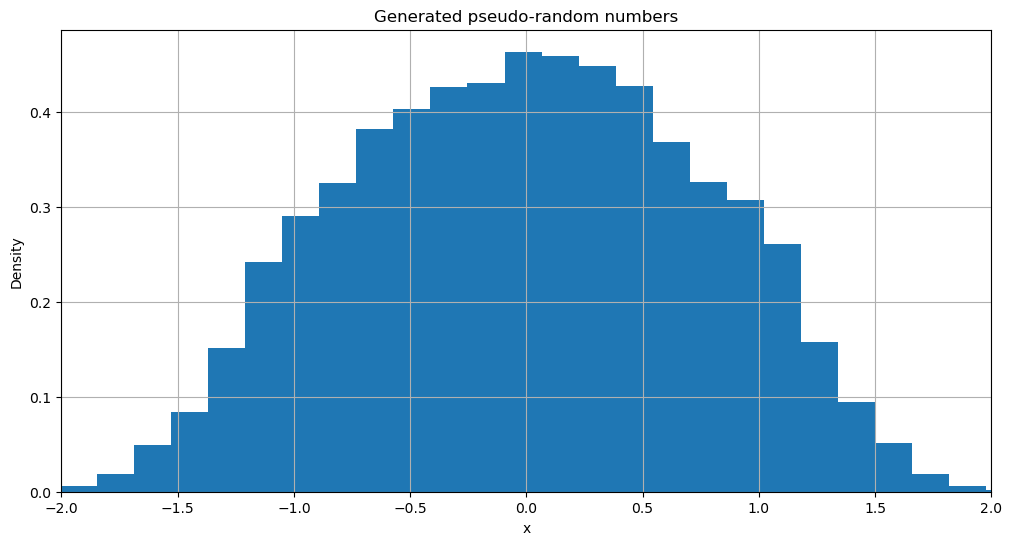

In [260]:
plt.figure(figsize = (12,6))
plt.hist(samples, bins=50, density=True)
# plt.plot(np.arange(-2,2.1,0.1),0.1*(4-np.arange(-2,2.1,0.1)**2), label = r"$y = e^{-2x}$")
plt.xlim(-2,2)
plt.ylabel('Density')
plt.grid()
plt.xlabel('x')
plt.title('Generated pseudo-random numbers')
# plt.legend()
plt.show()

In [261]:
print("Acceptance Percentage",accep/(accep+rej))

Acceptance Percentage 0.8684324793747286


In [262]:
# The target probabilty distribution match our expectations and has an acceptance
# rate of 0.86% for a C value of 1.2

# Question 7

In [106]:
# #-------------SHO
def p(rho,alpha):
    return 0.25*(alpha**2-rho**2)
# def E(rho,alpha):
#     return 0.5*(2/(alpha**2 - rho**2) + (rho**2))
def E(rho,alpha):
    return 0.5*((rho**2))


In [107]:
alpha_list = np.arange(0.4,200,5)
# alpha_list = [1.1]
energy_list = []
for alpha in tqdm(alpha_list):
    rho = 0.2
    step_size = 0.01
    rho_list = [rho]

    accep = 0
    rej = 0 
    for i in range(20000):
        old_prob = p(rho,alpha)
        rho_new = rho + (2*np.random.uniform()-1)*step_size
        new_prob = p(rho_new,alpha)
        gamma = np.random.uniform()
#         print(new_prob/old_prob)
        if gamma < min(1,new_prob/old_prob):
    #         print("Accept !")
            rho = rho_new
            rho_list.append(rho)
            accep = accep +1
        else:
    #         print("Reject")
            rej = rej + 1
    print("Acceptance Rate",(accep/(accep+rej)))
    rho_list = np.array(rho_list)
    Energy = E(rho_list,alpha)
    av_energy = Energy.mean()
    energy_list.append(av_energy)

  0%|          | 0/40 [00:00<?, ?it/s]

Acceptance Rate 0.9861
Acceptance Rate 1.0
Acceptance Rate 0.99995
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0


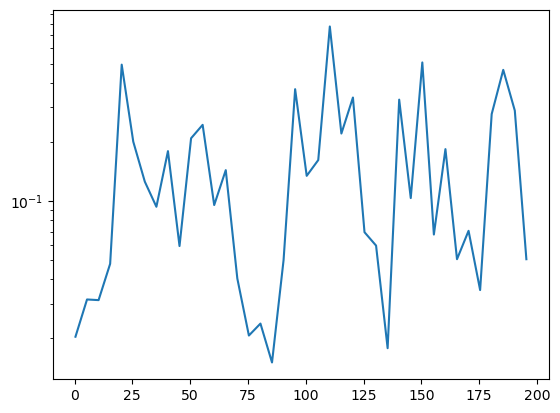

In [108]:
plt.plot(alpha_list,energy_list)
plt.yscale("log")